In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  Using cached tensorflow_datasets-4.8.0-py3-none-any.whl (5.2 MB)
  Using cached promise-2.3.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow_metadata-1.12.0-py3-none-any.whl (52 kB)
  Using cached etils-0.9.0-py3-none-any.whl (140 kB)
     -------------------------------------- 101.5/101.5 kB 5.7 MB/s eta 0:00:00
  Using cached importlib_resources-5.10.1-py3-none-any.whl (34 kB)
  Using cached googleapis_common_protos-1.57.0-py2.py3-none-any.whl (217 kB)
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=f0b932616e8392f0bb705b17803d1af53cd8640e701d7e6f35bd191c27ae1e69
  Stored in directory: c:\users\sreehari rajan\appdata\local\pip\cache\wheels\68\ee\8d\57af0d8b0d34c2e918ff29d3af02b348db6499bb107caa007e
Successfully built promise


In [1]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
aiohttp                      3.8.3
aiosignal                    1.3.1
anyio                        3.5.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
astunparse                   1.6.3
async-timeout                4.0.2
asynctest                    0.13.0
attrs                        22.1.0
backcall                     0.2.0
base58                       2.1.1
beautifulsoup4               4.11.1
bitarray                     2.6.0
bleach                       4.1.0
brotlipy                     0.7.0
cachetools                   5.2.0
certifi                      2022.12.7
cffi                         1.15.1
charset-normalizer           2.1.1
click                        8.1.3
codecov                      2.1.11
colorama                     0.4.6
coverage                     6.3.2
cryptography                 38.0.1
cycler                       0.11.0

You should consider upgrading via the 'F:\Softwares\anaconda\envs\ML_tensorflow\python.exe -m pip install --upgrade pip' command.


In [40]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')

for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu,True)
    print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [12]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [13]:
ds = tfds.load('fashion_mnist',split='train')

ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

In [14]:
import numpy as np

data_iterator =ds.as_numpy_iterator()

data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

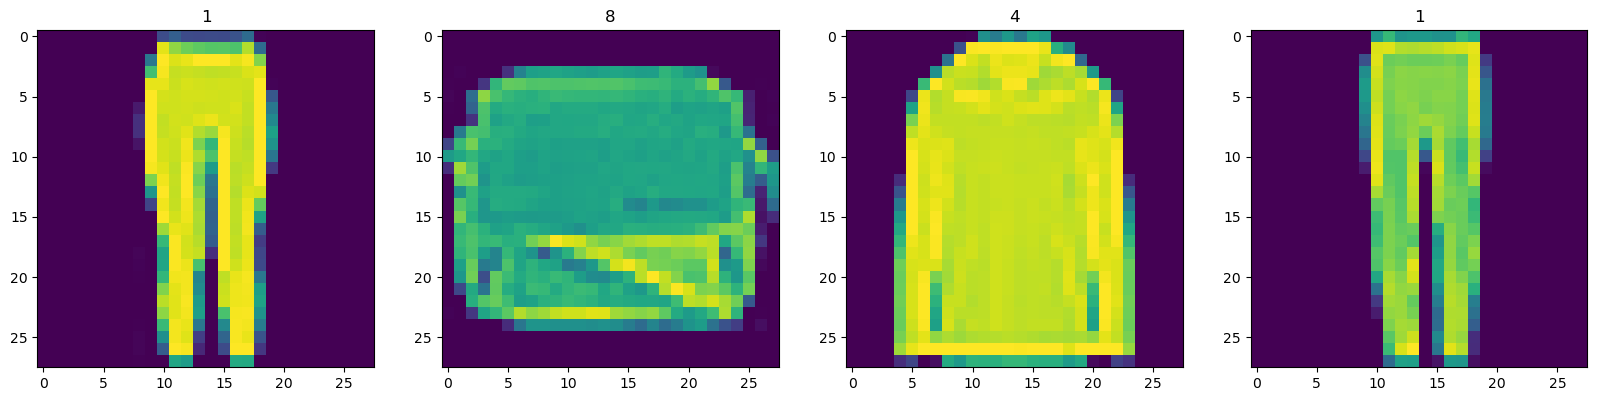

In [15]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))

for idx in range(4):
    sample = data_iterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [16]:
def scale_images(data):
    image = data['image']
    return image/255

In [17]:
# map
# cache
# shuffle
# batch
# prefetch

ds = tfds.load('fashion_mnist',split='train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)


In [18]:
ds.as_numpy_iterator().next()

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D

In [20]:
def build_generator():
    model = Sequential()
    
    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128 )))
    
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))    
    
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))
    
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))

    
    return model


In [21]:
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [22]:
import numpy as np

In [28]:
img = generator.predict(np.random.randn(4,128,1))
img

1/1 [==============================] - 0s 20ms/step


array([[[[0.49751687],
         [0.4932377 ],
         [0.49433583],
         ...,
         [0.48803556],
         [0.4882024 ],
         [0.49238455]],

        [[0.50521934],
         [0.49591684],
         [0.49095762],
         ...,
         [0.4824708 ],
         [0.4913722 ],
         [0.49458298]],

        [[0.5010419 ],
         [0.4915627 ],
         [0.48560417],
         ...,
         [0.4799446 ],
         [0.4854241 ],
         [0.49278128]],

        ...,

        [[0.49966168],
         [0.4978431 ],
         [0.4920291 ],
         ...,
         [0.49415806],
         [0.4978757 ],
         [0.49608207]],

        [[0.5046524 ],
         [0.5061655 ],
         [0.5002491 ],
         ...,
         [0.49870434],
         [0.4988391 ],
         [0.49775547]],

        [[0.5044849 ],
         [0.5023363 ],
         [0.5026888 ],
         ...,
         [0.4996106 ],
         [0.49957144],
         [0.49847236]]],


       [[[0.49918902],
         [0.4921396 ],
         [0.47

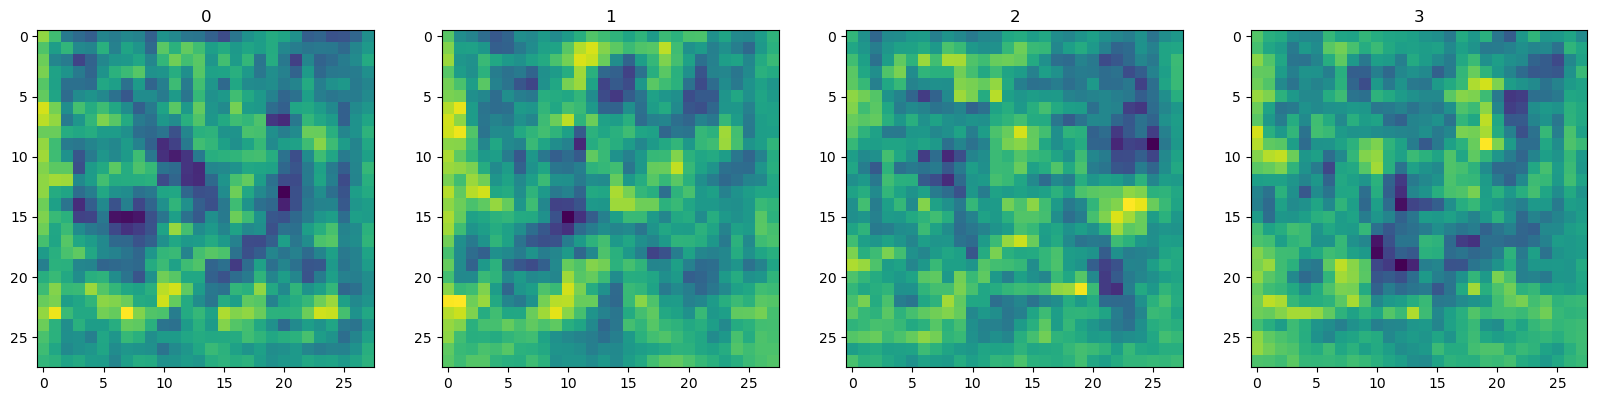

In [24]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))

for idx,img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [25]:
def build_discriminator():

    model = Sequential()
    
    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    
    

    return model


In [26]:
discriminator = build_discriminator()

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [29]:
discriminator.predict(img)

1/1 [==============================] - 1s 636ms/step


array([[0.49036837],
       [0.49036583],
       [0.49021935],
       [0.49040517]], dtype=float32)

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [31]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss= BinaryCrossentropy()


In [32]:
from tensorflow.keras.models import Model


In [55]:
class FashionGAN(Model):
    def __init__(self,generator,discriminator,*args,**kwargs):
        super().__init__(*args,**kwargs)
        
        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
        super().compile(*args,**kwargs)
        
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss=g_loss
        self.d_loss = d_loss
    
    def train_step(self,batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)),training = False)
    
    
        #train discriminator
        
        with tf.GradientTape() as d_tape:

            yhat_real = self.discriminator(real_images,training=True)
            yhat_fake = self.discriminator(fake_images,training=True)
            yhat_realfake = tf.concat([yhat_real,yhat_fake],axis=0)

            #labels
            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake+=tf.concat([noise_real,noise_fake],axis=0)

            total_d_loss = self.d_loss(y_realfake,yhat_realfake)

        dgrad = d_tape.gradient(total_d_loss,self.discriminator.trainable_variables)
        self.d_opt.apply_gradients (zip(dgrad,self.discriminator.trainable_variables))
        
        
    
        #train generator

        with tf.GradientTape() as g_tape:

            gen_images = self.generator(tf.random.normal((128,128,1)),training=True)

            predicted_labels = self.discriminator(gen_images,training=False)

            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)

        ggrad = g_tape.gradient(total_g_loss,self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

        return {"d_loss":total_d_loss,"g_loss":total_g_loss}
    
     
        

In [56]:
fashgan = FashionGAN(generator,discriminator)


In [57]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)

In [58]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [59]:
class ModelMonitor(Callback):
    def __init__(self,num_img=3,latent_dim=128):
        self.num_img=num_img
        self.latent_dim = latent_dim
    
    def on_epoch_end(self,epoch,logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images*=255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('generated_images',f'generated_img_{epoch}_{i}.png'))

In [60]:
hist = fashgan.fit(ds,epochs=20,callbacks=[ModelMonitor()])

Epoch 1/20
469/469 [==============================] - 130s 257ms/step - d_loss: 0.4930 - g_loss: 0.9994
Epoch 2/20
469/469 [==============================] - 112s 238ms/step - d_loss: 0.6944 - g_loss: 0.7645
Epoch 3/20
469/469 [==============================] - 118s 251ms/step - d_loss: 0.6776 - g_loss: 0.7993
Epoch 4/20
469/469 [==============================] - 111s 236ms/step - d_loss: 0.6981 - g_loss: 0.6388
Epoch 5/20
469/469 [==============================] - 111s 236ms/step - d_loss: 0.6879 - g_loss: 0.6721
Epoch 6/20
469/469 [==============================] - 110s 234ms/step - d_loss: 0.6973 - g_loss: 0.6469
Epoch 7/20
469/469 [==============================] - 110s 235ms/step - d_loss: 0.6928 - g_loss: 0.6559
Epoch 8/20
469/469 [==============================] - 110s 235ms/step - d_loss: 0.6865 - g_loss: 0.6756
Epoch 9/20
469/469 [==============================] - 110s 235ms/step - d_loss: 0.6549 - g_loss: 0.8937
Epoch 10/20
469/469 [==============================] - 111s 236m

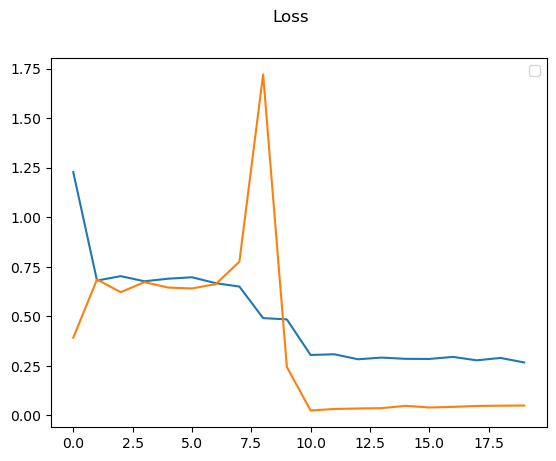

In [70]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'])
plt.plot(hist.history['g_loss'])
plt.legend()
plt.show()

In [ ]:
# generator.load_weights('path to weight')

1/1 [==============================] - 0s 17ms/step


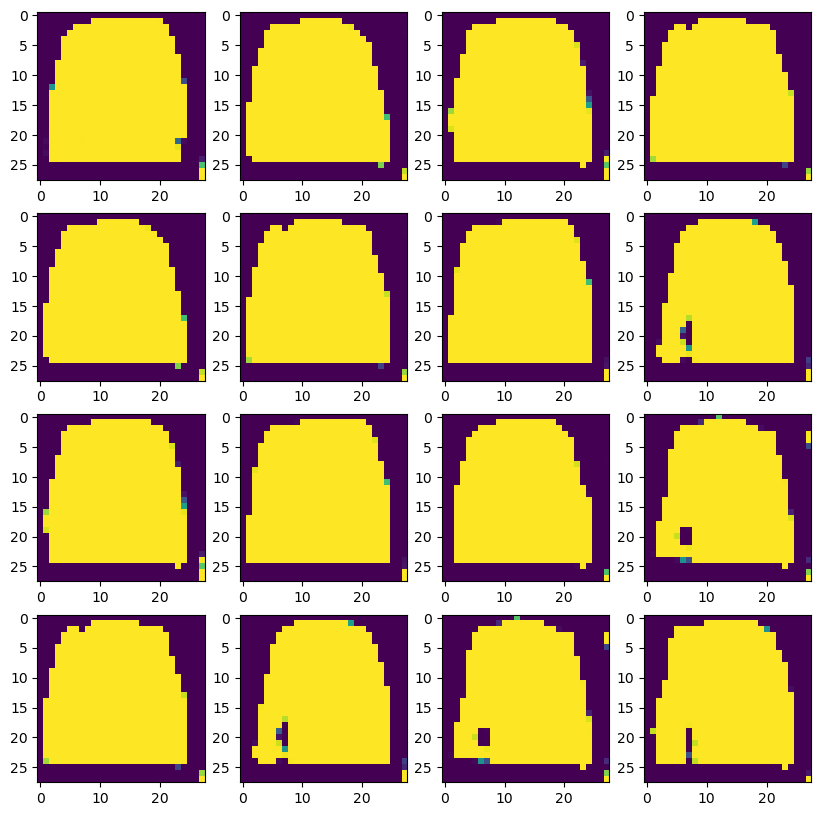

In [69]:
imgs = generator.predict(tf.random.normal((16,128,1)))

fig,ax = plt.subplots(ncols=4,nrows=4,figsize=(10,10))

for row in range(4):
    for col in range(4):
        ax[row][col].imshow(imgs[(row+1)*(col+1)-1])

In [ ]:
# generator.save('generator.h5')
# discriminator.savae('discriminator.h5') 